# 最大概似法(Maximum Likelihood Estimation, MLE)

## 常態分配的機率密度函數

## 範例1. 如果樣本點x=1, 計算來自常態分配N(0,1)的機率

In [12]:
# 載入套件
import numpy as np
import math

# 常態分配的機率密度函數(Probability Density Function, pdf)
def f(x, mean, std):
    return (1/((2*np.pi*std**2) ** .5)) * np.exp(-0.5*((x-mean)/std)**2) 

f(1, 0, 1)

0.24197072451914337

In [13]:
from scipy.stats import norm

# 平均數(mean)、標準差(std)
mean = 0
std = 1

# 計算來自常態分配N(0,1)的機率
norm.pdf(1, mean, std)

0.24197072451914337

## 繪製機率密度函數(pdf)

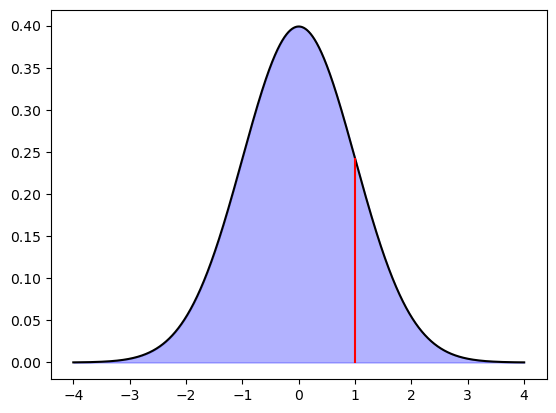

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 觀察值範圍
z1, z2 = -4, 4

# 平均數(mean)、標準差(std)
mean = 0
std = 1

# 樣本點
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x, mean, std)

# 繪圖
plt.plot(x,y,'black')

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')

plt.plot([1, 1], [0, norm.pdf(1, mean, std)], color='r')
plt.show()

## 範例2. 如果有兩個樣本點x=1、3, 計算來自常態分配N(1,1)及N(2,3)機率，哪一個可能性大?

In [15]:
# 載入套件
import numpy as np
import math
from scipy.stats import norm

# 計算來自常態分配 N(1,1)的機率
mean = 1   # 平均數(mean)
std = 1    # 標準差(std)
print(f'來自 N(1,1)的機率：{norm.pdf(1, mean, std) * norm.pdf(3, mean, std)}')


# 計算來自常態分配 N(2,3)的機率
mean = 2   # 平均數(mean)
std = 3    # 標準差(std)
print(f'來自 N(2,3)的機率：{norm.pdf(1, mean, std) * norm.pdf(3, mean, std)}')

來自 N(1,1)的機率：0.021539279301848634
來自 N(2,3)的機率：0.01582423339377573


## 範例3. 如果有一組樣本, 計算來自哪一個常態分配N($\mu, \sigma$)，機率最大?

In [16]:
# 載入套件
from scipy.stats import norm
from sympy import symbols, pi, exp, log
from sympy.stats import Probability, Normal

# 樣本
data = [1,3,5,3,4,2,5,6]

# x變數、平均數(m)、標準差(s)
x, m, s = symbols('x m s')

# 常態分配的機率密度函數(Probability Density Function, pdf)
pdf = (1/((2*pi*s**2) ** .5)) * exp(-0.5*((x-m)/s)**2) 
# 顯示 log(pdf) 函數 
log_p = log(pdf)
log_p

log(0.707106781186547*exp(-0.5*(-m + x)**2/s**2)/(pi**0.5*(s**2)**0.5))

In [17]:
# 帶入樣本資料
logP = 0
for xi in data:
    logP += log_p.subs({x: xi})
    
logP

log(0.707106781186547*exp(-0.5*(1 - m)**2/s**2)/(pi**0.5*(s**2)**0.5)) + log(0.707106781186547*exp(-0.5*(2 - m)**2/s**2)/(pi**0.5*(s**2)**0.5)) + 2*log(0.707106781186547*exp(-0.5*(3 - m)**2/s**2)/(pi**0.5*(s**2)**0.5)) + log(0.707106781186547*exp(-0.5*(4 - m)**2/s**2)/(pi**0.5*(s**2)**0.5)) + 2*log(0.707106781186547*exp(-0.5*(5 - m)**2/s**2)/(pi**0.5*(s**2)**0.5)) + log(0.707106781186547*exp(-0.5*(6 - m)**2/s**2)/(pi**0.5*(s**2)**0.5))

## 上述函數各對平均數、變異數偏微分 

In [18]:
from sympy import diff

logp_diff_m = diff(logP, m) # 對平均數(m)偏微分  

logp_diff_s = diff(logP, s) # 對變異數(s)偏微分

print('m 偏導數:', logp_diff_m)
print('s 偏導數:', logp_diff_s)

m 偏導數: -0.5*(2*m - 12)/s**2 - 1.0*(2*m - 10)/s**2 - 0.5*(2*m - 8)/s**2 - 1.0*(2*m - 6)/s**2 - 0.5*(2*m - 4)/s**2 - 0.5*(2*m - 2)/s**2
s 偏導數: 1.4142135623731*pi**0.5*(-0.707106781186547*exp(-0.5*(1 - m)**2/s**2)/(pi**0.5*s*(s**2)**0.5) + 0.707106781186547*(1 - m)**2*exp(-0.5*(1 - m)**2/s**2)/(pi**0.5*s**3*(s**2)**0.5))*(s**2)**0.5*exp(0.5*(1 - m)**2/s**2) + 1.4142135623731*pi**0.5*(-0.707106781186547*exp(-0.5*(2 - m)**2/s**2)/(pi**0.5*s*(s**2)**0.5) + 0.707106781186547*(2 - m)**2*exp(-0.5*(2 - m)**2/s**2)/(pi**0.5*s**3*(s**2)**0.5))*(s**2)**0.5*exp(0.5*(2 - m)**2/s**2) + 2.82842712474619*pi**0.5*(-0.707106781186547*exp(-0.5*(3 - m)**2/s**2)/(pi**0.5*s*(s**2)**0.5) + 0.707106781186547*(3 - m)**2*exp(-0.5*(3 - m)**2/s**2)/(pi**0.5*s**3*(s**2)**0.5))*(s**2)**0.5*exp(0.5*(3 - m)**2/s**2) + 1.4142135623731*pi**0.5*(-0.707106781186547*exp(-0.5*(4 - m)**2/s**2)/(pi**0.5*s*(s**2)**0.5) + 0.707106781186547*(4 - m)**2*exp(-0.5*(4 - m)**2/s**2)/(pi**0.5*s**3*(s**2)**0.5))*(s**2)**0.5*exp(0.5*(4 - 

## 簡化偏導數

In [19]:
from sympy import simplify

# 簡化 m 偏導數
logp_diff_m = simplify(logp_diff_m)
print(logp_diff_m)
print()

# 簡化 s 偏導數
logp_diff_s = simplify(logp_diff_s)
logp_diff_s

(29.0 - 8.0*m)/s**2



1.0*(8.0*m**2 - 58.0*m - 8.0*s**2 + 125.0)/s**3

## 令一階導數=0，有最大值，可得到聯立方程式

In [20]:
from sympy import solve

funcs = [logp_diff_s, logp_diff_m]
solve(funcs, [m, s])

[(3.62500000000000, -1.57619002661481), (3.62500000000000, 1.57619002661481)]

## 使用NumPy驗證

In [21]:
np.mean(data), np.std(data)

(3.625, 1.5761900266148114)